Instructions

For our small group project, we will be simulating the ocean tides in Santa Cruz. Tides oscillate from a high state, to a low state, and back to a high state roughly every twelve hours. This pattern results in two high tides and two low tides each twenty-four-hour period. Additionally, the height of the high tide and the depth of the low tide oscillate, such that one high tide and one low tide are more extreme than the other. You will use your group COPY of this template to submitLinks to an external site. your Group Tidal Report to this Canvas Assignment before the due date. 

1) Download this data setLinks to an external site. that lists some tidal measurements Santa Cruz in January and February 2022. In your Jupyter notebook, define an oscillatory function in Python to describe the intra- and inter-day variations in the tide. DONE - Mason 

2) Using the scipy library, fit the oscillatory function to the data assuming the root mean squared experimental error on the height of the tide is 0.25 ft. Document these steps in the Jupyter notebook, and graph both the model and the data on the same plot. Label the data, provide sufficient labeling of the axes to provide clarity, and have the notebook save the figure to a PDF. DONE - Mason

3) 
Oleg: Next, have your notebook subtract off the best fit function from the data and plot the residuals. Assess graphically and mathematically deviations of the measured tidal data from the model. 

Ryan: Plot a histogram of the residuals and measure the standard deviation. Is the scatter in the data larger than the assumed experimental error? 

Mason: Estimate the intrinsic scatter in the data after accounting for the assumed measurement error. 

Ryan: Save the histogram as a PDF using our histogram best practices, including labeling of the data, axis labels, and "reasonable" bin widths as demonstrated in class.

4) During the first high-tide of January 14, the tsunami from the underwater eruption of the Hunga Tonga-Hunga Ha'apai volcano reached the shores of Santa Cruz. The tsunami increased water levels near high tide by about 2ft. How large of a deviation is this tsunami, in terms of standard deviations of the distribution of normal tides from the model? Add a single 2ft outlier to the histogram of data and replot it as part of your Jupyter notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
# Load tide data from a CSV file
with open("ASTR19_S22_group_project_data.txt", "r") as infile:
    tide_data = infile.read().split("\n")

day = []
time = []
height = []


def militaryTimeToDay(time):
    hour, minute = map(int, time.split(":"))
    return hour / 24 + minute / 1440


for line in tide_data[3:]:
    line = line.lstrip(" ")
    lineData = line.split(" ")
    lineData = [x for x in lineData if x != ""]
    #print(lineData)
    day.append(int(lineData[0]))
    time.append(militaryTimeToDay(lineData[1]))
    height.append(float(lineData[2]))

# Define the X and Y arrays and Y error
x = np.array(time)

y = np.array(height)
y_err = np.full(len(y), 0.25)


# Define the Oscillatory function
def oscfunc(x, a, b, c, d):
    return a * np.sin(b * x + c) + d

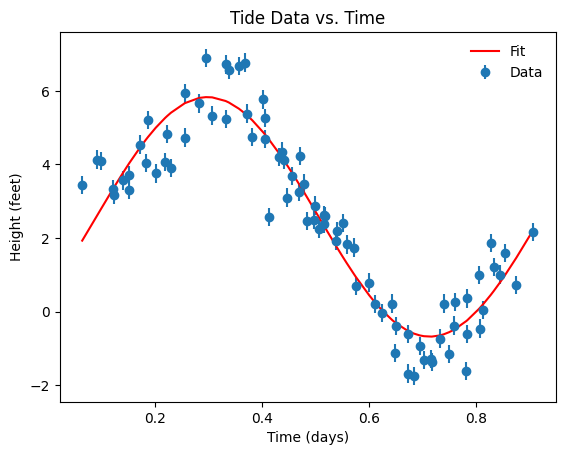

In [8]:
params, _ = curve_fit(oscfunc, x, y, sigma=y_err)

x_model = np.sort(x)
y_model = oscfunc(x_model, *params)

plt.errorbar(x, y, yerr=y_err, fmt="o", label="Data")
plt.plot(x_model, y_model,color="red" ,label="Fit")
plt.xlabel("Time (days)")
plt.ylabel("Height (feet)")
plt.title("Tide Data vs. Time")
plt.legend(frameon=False)
fig = plt.gcf()
plt.show()
fig.savefig("TideData.pdf", bbox_inches="tight")